In [1]:
cd

C:\Users\K


# Predicting the Popularity of an App from the Google Play Store

## Contents
### Introduction
### Data Cleaning 
### EDA
### Inferential Analysis 
### Initial Model 
### Tuning the Model
### Takeaways
### Future Direction


## Introduction

The purpose of this project is to prdict the number of downloads for a given app based upon a number of different features, including price, rating, number of reviews, and the versions of Android supported. The dataset comes from Kaggle and was scrapped from the Google Play Store and last updated on February 3rd, 2019. It can be found here: https://www.kaggle.com/lava18/google-play-store-apps

We'll go through several parts of the data science process including cleaning the data, providing inferential analysis, creating an inital predictive model, and, finally, tuning that given model. 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Allow display of all columns
pd.set_option('display.max_columns', None)

In [4]:
# Read in the dataset
gp = pd.read_csv('googleplaystore.csv')
gp.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Let's briefly describe each of the columns:
'App' gives the name of the app.
'Category' lists the type of app it is - art, tool, game, etc.
'Rating' is an average of all reviews, with 5 being the highest and 1 the lowest.
'Reviews' lists the number of reviews an app has.
'Size' is the size of the file in megabytes.
'Installs' is the number of downloads per app. We don't know exact values, only that they've exceeded a given limit.
'Type' displays wheter the app is free or requires purchase.
'Price' lists the cost of the app.
'Genres'  is very similar to 'Category', though a bit more nuanced.
'Last Updated' gives tha last known date that the app was updated on the Google Play Store.
'Current Ver' lists the current verison of the app.
'Android Version' lists how many versions of Android are supported. The lower the number, the more versions it supports. 

## Data Cleaning

In [5]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We notice initally that there are many missing values, primarily in the Rating column. Seeing as how it would be difficult to track down all of those ratings (assuming they exist), lets just eliminate the rows containing missing values. While we could also just eliminate the Rating column itself and keep the vast majority of the rows insteaad of dropping almost 10% of the rows, we're operating off the hunch that ratings play an important factor in determining how many downloads an app can achieve. 

It's also important to not that we only have one numerical value, despite several of the features having number values. This will create an additional step in the cleaning process.  

In [6]:
# Drop all 'Rating' rows that have a missing value
gp = gp[gp['Rating'].notna()]

Let's also get rid of any duplicate rows before we get to the rest of the cleaning process.

In [7]:
# Find duplicates and sort by 'App' feature
gp[gp.duplicated()].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
1324,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,4.6,115721,67M,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 11, 2018",3.5.0,5.0 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68M,"1,000+",Paid,$33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
946,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
977,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
10768,AAFP,MEDICAL,3.8,63,24M,"10,000+",Free,0,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up


In [8]:
# Drop all duplicates that are the same in every single category
gp = gp.drop_duplicates()

In [9]:
# Look for additonal duplicates just based on 'App' name
gp[gp.duplicated('App', keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up


It appears that we still have several more duplicates, but the only difference is that they have varying number of reviews. We have a couple of options here. We could either average all of the reviews per duplicate values or just take the highest review value. We'll opt for the latter because seeing as how every other feature per duplicate is identical, this likely has less to do with different versions of the app and more to do with a glitch with the web scrapping tool. 

We'll sort the dataset by reviews with the largest with ascending set to False and then keep only the first value.  

In [10]:
# Sort by 'Reviews' and drop all 'App' duplicates, keeping just the first instance, which 
# should have the highest review values
gp = gp.sort_values('Reviews', ascending=False)
gp = gp.drop_duplicates(subset='App', keep='first')

In [11]:
# Checking once more, we have no more duplicates
gp[gp.duplicated('App', keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 2989 to 5139
Data columns (total 13 columns):
App               8197 non-null object
Category          8197 non-null object
Rating            8197 non-null float64
Reviews           8197 non-null object
Size              8197 non-null object
Installs          8197 non-null object
Type              8197 non-null object
Price             8197 non-null object
Content Rating    8196 non-null object
Genres            8197 non-null object
Last Updated      8197 non-null object
Current Ver       8193 non-null object
Android Ver       8194 non-null object
dtypes: float64(1), object(12)
memory usage: 896.5+ KB


The duplicates, along with missing values, reduced our dataset by almost 2000 rows. Let's also resort the dataset by the index.

In [13]:
gp = gp.sort_index(axis=0)

In [14]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


Moving on, since we have so many different features that are in a string format, let's take a look at the number of unique features for each.

In [15]:
gp['Category'].value_counts()
# Family apps are almost double in number to the next closest app category

FAMILY                 1652
GAME                    896
TOOLS                   719
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               107
FOOD_AND_DRINK           94
ENTERTAINMENT            86
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           61
ART_AND_DESIGN           59
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
1.9                       1
Name: Category, dtype: int64

In [16]:
gp['Type'].value_counts()
# Free apps far outnumber Paid apps

Free    7592
Paid     604
0          1
Name: Type, dtype: int64

In [17]:
gp['Content Rating'].value_counts()
# The large majority of apps are rated for all users

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [18]:
gp['Genres'].value_counts(ascending=True)
# A bit different from the 'Category' feature, but the Tools apps outnumber the rest

Video Players & Editors;Creativity         1
Entertainment;Education                    1
Adventure;Education                        1
Tools;Education                            1
Puzzle;Education                           1
Adventure;Brain Games                      1
Lifestyle;Education                        1
Strategy;Education                         1
Music & Audio;Music & Video                1
Comics;Creativity                          1
Strategy;Creativity                        1
Racing;Pretend Play                        1
Card;Brain Games                           1
Parenting;Brain Games                      1
Casual;Music & Video                       1
Arcade;Pretend Play                        1
February 11, 2018                          1
Communication;Creativity                   1
Travel & Local;Action & Adventure          1
Health & Fitness;Education                 1
Role Playing;Brain Games                   1
Health & Fitness;Action & Adventure        1
Art & Desi

In [19]:
gp['Current Ver'].value_counts()

Varies with device      1011
1.0                      448
1.1                      191
1.2                      125
2.0                      117
1.3                      115
1.0.1                     76
1.4                       76
1.5                       72
1.0.0                     67
1.6                       57
1.0.2                     52
2.1                       50
1.7                       47
1.0.4                     46
1.0.3                     44
1.2.1                     43
3.0                       40
1.0.5                     39
2.0.0                     39
1.1.0                     38
1.0.6                     36
1.8                       35
1.2.0                     35
1.9                       32
2.4                       31
1.1.1                     31
1.0.9                     30
4.0                       30
2.3.2                     29
                        ... 
6.3.8                      1
42.0                       1
1.2.1107                   1
1.23.0        

In [20]:
gp['Size'].value_counts()
# The majority of apps vary in size

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
15M                    138
17M                    117
25M                    113
16M                    106
21M                    106
19M                    105
26M                    104
20M                     99
24M                     99
18M                     94
23M                     93
10M                     88
22M                     88
27M                     82
28M                     72
30M                     68
37M                     66
31M                     63
33M                     63
35M                     62
29M                     60
3.3M                    59
44M                     55
2.5M                    53
40M                     53
                      ... 
676k                     1
525k                     1
309k                     1
939k                     1
787k                     1
206k                     1
8

Several features won't be useful: 'Genres' has a good deal of overlap with 'Category' but likely has far too much nuance to be useful as a categorical feature. 'Current Ver' doesn't tell us much. It may imply how many times an app has been updated, but without knowing the rate of updates or the number of updates since it's arrival on the Play Store, it's not of much use. 'Size' has to be treated as a categorical variable because it's largest value ia not a number. And unless we group several of the values, there are to many values for it to be a useful features. Plus, since the largest value states that the app size varies by device, it may not be particularly useful feature in helping our model distinguish between apps. 

We'll eventually be deleting the 'App' column as it has far too much variety to be useful as a categorical feature. Unless we can do some NLP, we'll just drop it. We may revisit that decision if our model performs poorly. However, for now, we'll keep it because it may allow for some interesting fun facts, such as which apps have the highest and lowest ratings, reviews, and downloads.  

In [21]:
# Drop unhelpful features
gp = gp.drop(['Genres', 'Current Ver', 'Size'], axis=1)

We'll also convert the 'Last Updated' category to datetime in hope that it might be of some use, perhaps through feature engineering.

In [22]:
# Convert to datetime
gp['Last Updated'] = pd.to_datetime(gp['Last Updated'], errors='coerce')

We'll now begin the process of converting several of our object variables into numerical variables. Let's start by stripping away some string characters. 

In [23]:
# Strip the 'Reviews' values of spaces  on the left and the letter M on the right
gp['Reviews'] = gp['Reviews'].map(lambda x: x.lstrip('').rstrip('M'))

In [24]:
# Strip the 'Installs' values of spaces  on the left and + on the right
gp['Installs'] = gp['Installs'].map(lambda x: x.lstrip('').rstrip('+'))

In [25]:
gp['Installs'] = gp['Installs'].replace(',','', regex=True)

In [26]:
# Strip the 'Price' values of $ on the left
gp['Price'] = gp['Price'].map(lambda x: x.lstrip('$'))

In [27]:
gp.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,2018-01-07,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,2018-06-20,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,Free,0,Everyone,2017-03-26,2.3 and up


In [28]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 0 to 10840
Data columns (total 10 columns):
App               8197 non-null object
Category          8197 non-null object
Rating            8197 non-null float64
Reviews           8197 non-null object
Installs          8197 non-null object
Type              8197 non-null object
Price             8197 non-null object
Content Rating    8196 non-null object
Last Updated      8196 non-null datetime64[ns]
Android Ver       8194 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 704.4+ KB


We still seem to have some missing values. Before we can convert some of our categorical feature values to float, we'll need to get rid of the appropriate rows.

In [29]:
# Look for any rows that still contain missing values
gp[gp.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,1000,Paid,1.49,Everyone,2018-07-20,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,10000,Free,0,Everyone,2018-03-27,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0,Free,0,Everyone,NaN,NaT,NaN


In [30]:
# Drop rows withmissing values 
gp = gp.drop([4453, 4490, 10472])

In [31]:
# Convert to float
gp['Reviews'] = gp['Reviews'].astype(float)
gp['Installs'] = gp['Installs'].astype(float)
gp['Price'] = gp['Price'].astype(float)

For the Android version variable, most apps either vary by device or support all phones from 4.1 and up. To simplify the number of values we have, we'll just keep the first string of each model number. There are only a small number of apps that haven't kept up with the current version of Android, not enough to affect our predictability, so we'll leave them in the dataset. 

In [32]:
gp['Android Ver'].value_counts()

4.1 and up            1812
4.0.3 and up          1140
4.0 and up            1042
Varies with device     947
4.4 and up             713
2.3 and up             548
5.0 and up             447
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
3.0 and up             200
4.3 and up             185
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [33]:
# Keep only the firat character of the Android version
gp['Android Ver'] = gp['Android Ver'].str[:1]

In [34]:
# Reduced number of unique values
gp['Android Ver'].value_counts()

4    5216
2    1129
V     947
5     466
3     239
1     105
7      45
6      42
8       5
Name: Android Ver, dtype: int64

For 'Installs' we see that there is a wide range of discrete values. In fact, we don't know the exact number of downloads for any app. All we know is the particular threshold that it surpassed. For our purposes, however,  we'll just treat the values as the actual number of downloads. We'll continue treating the column as categorical, but we'll convert the values to float so that we can use them for inferential analysis. 

In [35]:
gp['Installs'].value_counts().sort_index()
# Apps that have more than 1,000,000 downloads but fewer than 5,000,000 outnumber the rest

1.000000e+00       3
5.000000e+00       9
1.000000e+01      69
5.000000e+01      56
1.000000e+02     303
5.000000e+02     199
1.000000e+03     696
5.000000e+03     425
1.000000e+04     985
5.000000e+04     457
1.000000e+05    1095
5.000000e+05     504
1.000000e+06    1416
5.000000e+06     608
1.000000e+07     934
5.000000e+07     203
1.000000e+08     188
5.000000e+08      24
1.000000e+09      20
Name: Installs, dtype: int64

In [36]:
gp.drop(gp.loc[gp['Installs'] <= 500].index, inplace=True)

In [37]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7555 entries, 0 to 10840
Data columns (total 10 columns):
App               7555 non-null object
Category          7555 non-null object
Rating            7555 non-null float64
Reviews           7555 non-null float64
Installs          7555 non-null float64
Type              7555 non-null object
Price             7555 non-null float64
Content Rating    7555 non-null object
Last Updated      7555 non-null datetime64[ns]
Android Ver       7555 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 649.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D8D95EF0>]],
      dtype=object)

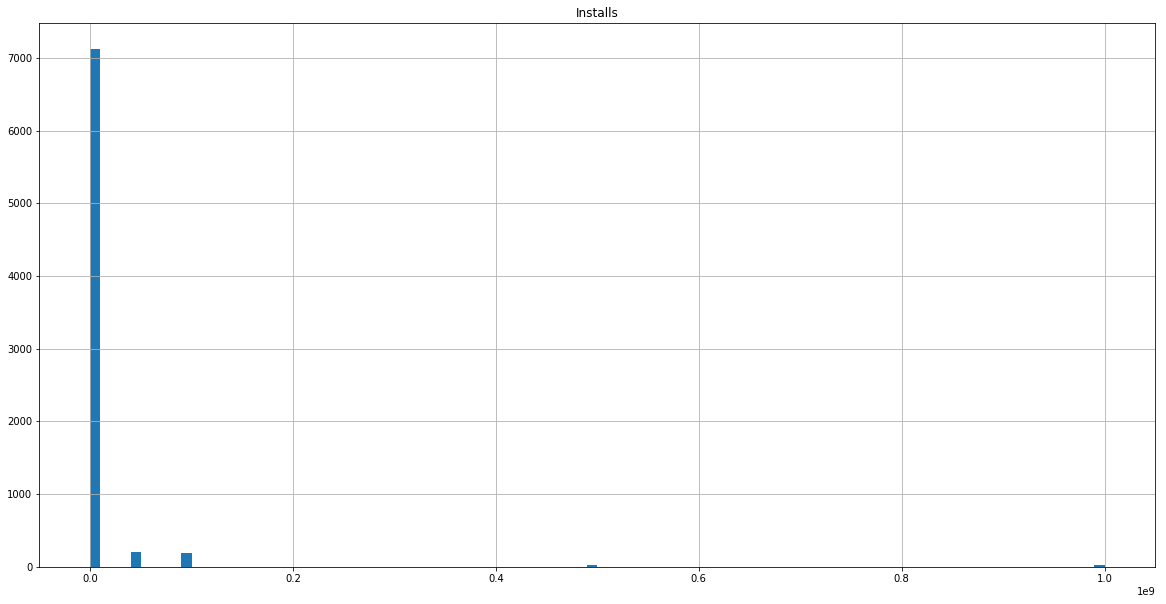

In [38]:
# Histogram of 'Installs'
gp.hist('Installs', bins=100, figsize=(20,10))

Let's now consider the 'Type' column and map any 'Free' values ot 0 and any 'Paid' values to 1.

In [39]:
gp['Type'].value_counts()

Free    7088
Paid     467
Name: Type, dtype: int64

In [40]:
# If game is free turn value to 0, if paid then make it a 1
gp['Type'] = gp['Type'].map({'Free':0, 'Paid': 1})

We can't do much with the datetime column the way that it currently is. What we can do is create a new feature that details how long it's been since an app was updated, at least based on when the dataset was uploaded. While this won't tell us anything about the rate at which a feature is updated, the justification for this feature is that perhaps knowing something about the last update will give some insight into how many downloads an app enjoys. Perhaps apps that have not been updated for a long time, say over a year or two, may not have as many downloads as one that has been updated recently. The feature is a bit flawed without the update rate, but perhaps we'll luck out and gain some useful insight.   

In [41]:
# Create the date of dataset upload and convert to datetime
final_date = '2019-02-03'
final_date = pd.to_datetime(final_date)

In [42]:
final_date

Timestamp('2019-02-03 00:00:00')

In [43]:
# Create new column that finds the difference between the time between the dataset upload and the last known update
# and converts it to days
gp['Update Days'] = (final_date - gp['Last Updated']) / np.timedelta64(1, 'D')
gp.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Update Days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,0,0.0,Everyone,2018-01-07,4,392.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,0,0.0,Everyone,2018-08-01,4,186.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,0,0.0,Teen,2018-06-08,4,240.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,0,0.0,Everyone,2018-06-20,4,228.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,50000.0,0,0.0,Everyone,2017-03-26,2,679.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D8D470F0>]],
      dtype=object)

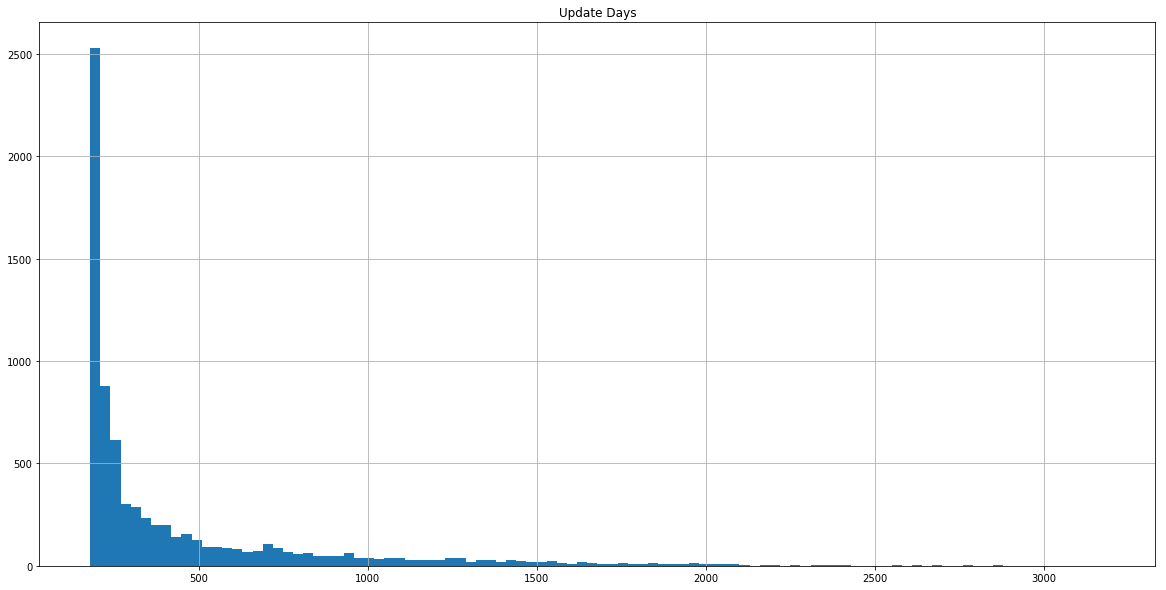

In [44]:
# Histogram of 'Update Days'
gp.hist('Update Days', bins=100, figsize=(20,10))

We can see that the 'Update Days' column is heavily right skewed, suggesting that most of the apps were update less than 250 days before this dataset was posted.

In [45]:
# Drop the datetime column because its values are no longer useful.
gp = gp.drop('Last Updated', axis=1)

In [46]:
gp.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Android Ver,Update Days
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,0,0.0,Everyone,4,392.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,0,0.0,Everyone,4,186.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,0,0.0,Teen,4,240.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,0,0.0,Everyone,4,228.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,50000.0,0,0.0,Everyone,2,679.0


In [47]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7555 entries, 0 to 10840
Data columns (total 10 columns):
App               7555 non-null object
Category          7555 non-null object
Rating            7555 non-null float64
Reviews           7555 non-null float64
Installs          7555 non-null float64
Type              7555 non-null int64
Price             7555 non-null float64
Content Rating    7555 non-null object
Android Ver       7555 non-null object
Update Days       7555 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 649.3+ KB


In [48]:
gp.describe()

,Rating,Reviews,Installs,Type,Price,Update Days
count,7555.000000,7.555000e+03,7.555000e+03,7555.000000,7555.000000,7555.000000
mean,4.158438,2.769038e+05,9.946131e+06,0.061813,1.002217,446.726142
std,0.496481,2.066762e+06,6.061012e+07,0.240832,16.926753,407.918029
min,1.000000,1.000000e+00,1.000000e+03,0.000000,0.000000,179.000000
25%,4.000000,2.590000e+02,1.000000e+04,0.000000,0.000000,198.000000
50%,4.300000,4.706000e+03,5.000000e+05,0.000000,0.000000,255.000000
75%,4.500000,5.404850e+04,5.000000e+06,0.000000,0.000000,513.000000
max,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000,3180.000000


We'll now add an additional column called 'Influence' which consists of the log of 'Rating' * 'Reviews'. Apps that have more downloads are likely to have more reviews. It's been suggested that apps with higher ratings and greater reviews have better visibility on the Play store. The majority of people also check the rating and number of downloads befor they purchase an app.Thus, it seems like a useful variable to combine both of those features. However, without taking the log of the product we have already high review values result in even higher Influence value, so much so that it will result in severly skewed data. Instead, we'll take the log of the product to limit the amount of skew. The larger the value, the greater the influcnce. The hope is that it might shed some light on the number of downloads in a given app.   

In [49]:
# New variable create by taking the multiplying the 'Rating' and 'Reviews' columns
gp['Influence'] = np.log(gp['Rating'] * gp['Reviews'])

In [50]:
gp.describe()

,Rating,Reviews,Installs,Type,Price,Update Days,Influence
count,7555.000000,7.555000e+03,7.555000e+03,7555.000000,7555.000000,7555.000000,7555.000000
mean,4.158438,2.769038e+05,9.946131e+06,0.061813,1.002217,446.726142,9.755508
std,0.496481,2.066762e+06,6.061012e+07,0.240832,16.926753,407.918029,3.419519
min,1.000000,1.000000e+00,1.000000e+03,0.000000,0.000000,179.000000,0.000000
25%,4.000000,2.590000e+02,1.000000e+04,0.000000,0.000000,198.000000,6.938187
50%,4.300000,4.706000e+03,5.000000e+05,0.000000,0.000000,255.000000,9.893356
75%,4.500000,5.404850e+04,5.000000e+06,0.000000,0.000000,513.000000,12.359309
max,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000,3180.000000,19.585234


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D8D9CF60>]],
      dtype=object)

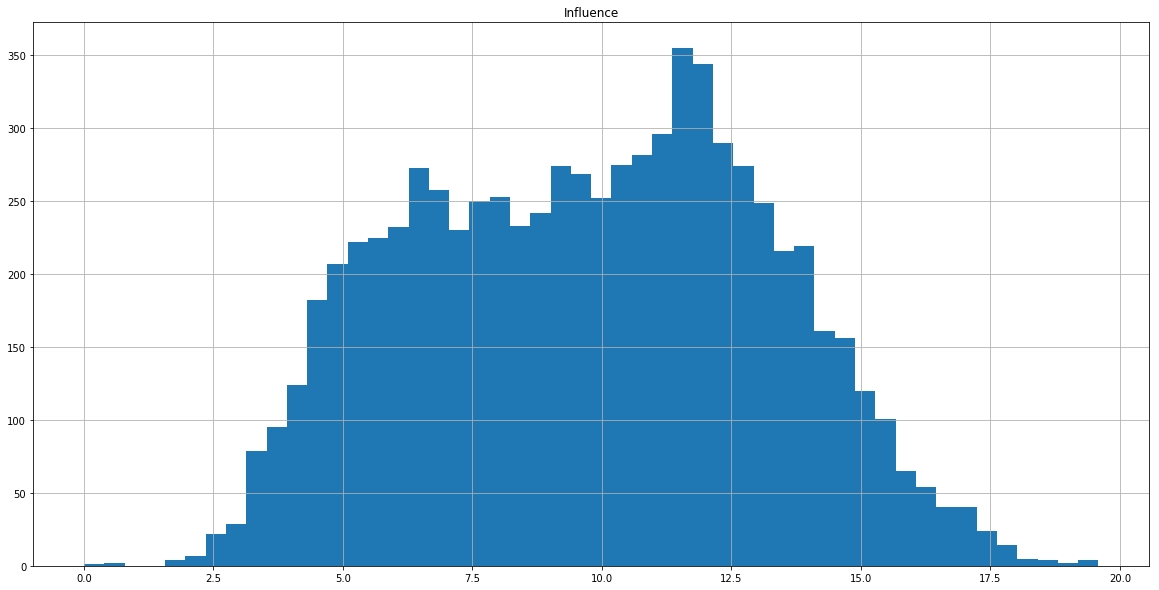

In [51]:
# Histogram of influence column
gp.hist('Influence', bins=50, figsize=(20,10))

'Influence has  a fairly normal distribution, thanks to the log transformation. But apps that have more reviews will have greater influence than those that have fewer downloads.

In [52]:
# Reorder the dataset so that the target variable is at the end of the dataset.
feature_order = [feature for feature in list(gp.columns) if feature not in ["Installs"]] + ["Installs"]
gp = gp.loc[:, feature_order]

In [53]:
gp.head()

,App,Category,Rating,Reviews,Type,Price,Content Rating,Android Ver,Update Days,Influence,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,0,0.0,Everyone,4,392.0,6.479891,10000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,0,0.0,Everyone,4,186.0,12.927071,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,0,0.0,Teen,4,240.0,13.785462,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,0,0.0,Everyone,4,228.0,8.332814,100000.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,0,0.0,Everyone,2,679.0,6.599598,50000.0


In [54]:
# Save dataset
gp.to_csv('google_play_final.csv')

We'll also save a version of the dataset without the 'App' column that will be used for machine learning. 

In [55]:
# Drop the 'App' column
gpa = gp.drop('App', axis=1)

In [56]:
gpa.head()

,Category,Rating,Reviews,Type,Price,Content Rating,Android Ver,Update Days,Influence,Installs
0,ART_AND_DESIGN,4.1,159.0,0,0.0,Everyone,4,392.0,6.479891,10000.0
2,ART_AND_DESIGN,4.7,87510.0,0,0.0,Everyone,4,186.0,12.927071,5000000.0
3,ART_AND_DESIGN,4.5,215644.0,0,0.0,Teen,4,240.0,13.785462,50000000.0
4,ART_AND_DESIGN,4.3,967.0,0,0.0,Everyone,4,228.0,8.332814,100000.0
5,ART_AND_DESIGN,4.4,167.0,0,0.0,Everyone,2,679.0,6.599598,50000.0


In [57]:
# Save dataset
gpa.to_csv('google_play_final_ML.csv')

## EDA

Now that we have our cleaned dataset, we can try to better understand the relationships among our features.

In [58]:
import seaborn as sns

We'll start by creating a heatmap to better understand the correlations among our various numerical features.

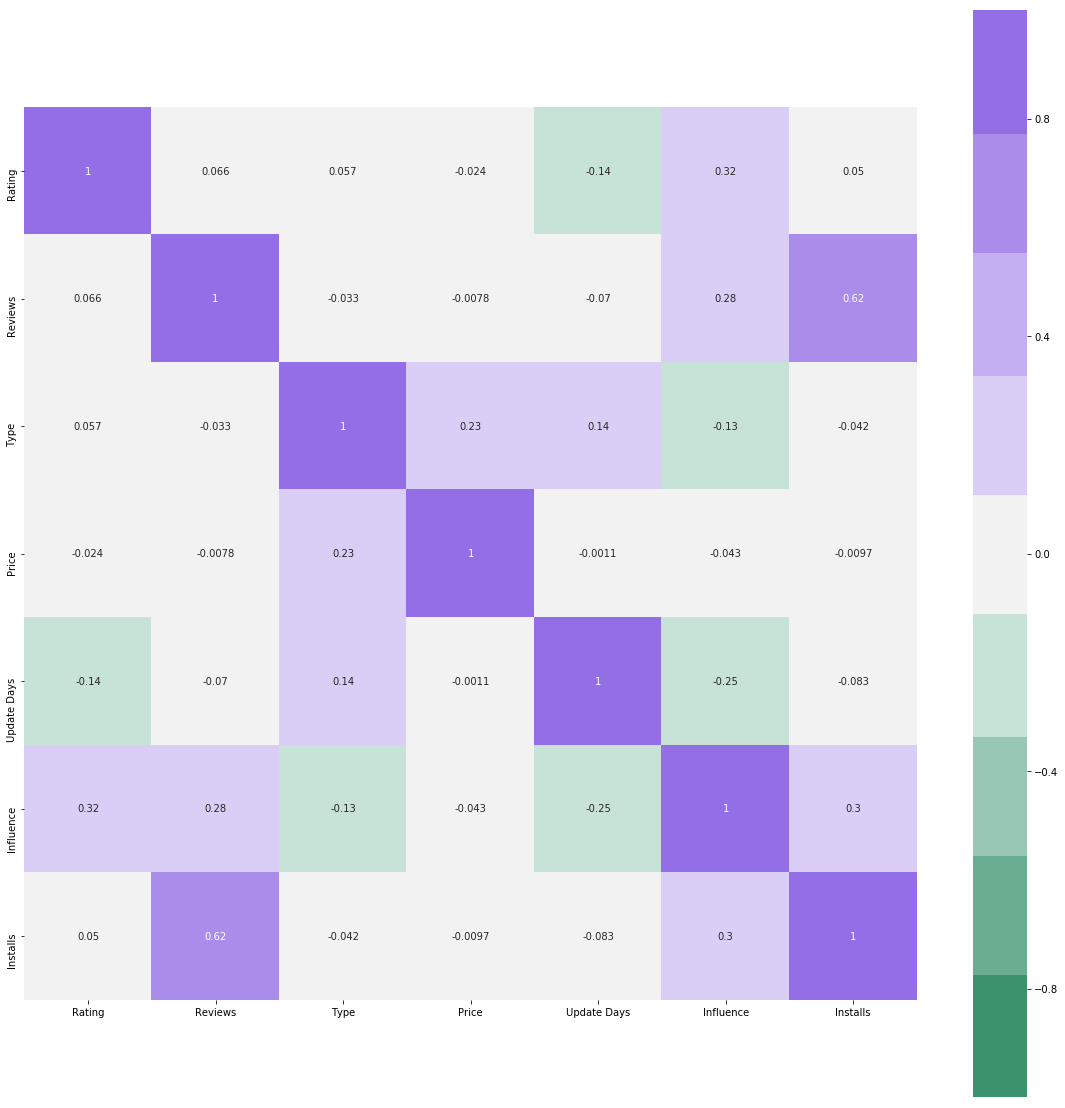

In [59]:
# Heatmap of numerical features
plt.figure(figsize=(20, 20))
corrall = gp.corr()
axis = sns.heatmap(corrall, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True, annot=True)

The strongest correlation appears to be between the number of reviews and the number of downloads, which makes sense because apps with high downloads are also likely to have more reviews. The 'Influence' feature we created has a positive correlation with 'Installs', which is expected given the strong correlation between 'Reviews' and 'Installs'. Surprisingly, there's little connection between the rating of an app and how many installs it has. Even more surpising, 'Type', 'Price', and 'Update Days' all correlate slightly negatively with 'Installs'.

There are also some other negative correlations to note. Specifically, 'Update Days' correlate negatively with both 'Rating' and 'Influence' suggesting that apps that have not been update recently have rate lower and are also less visible.
 
Let's also display a pairplot to get a visualization of the many correlations.

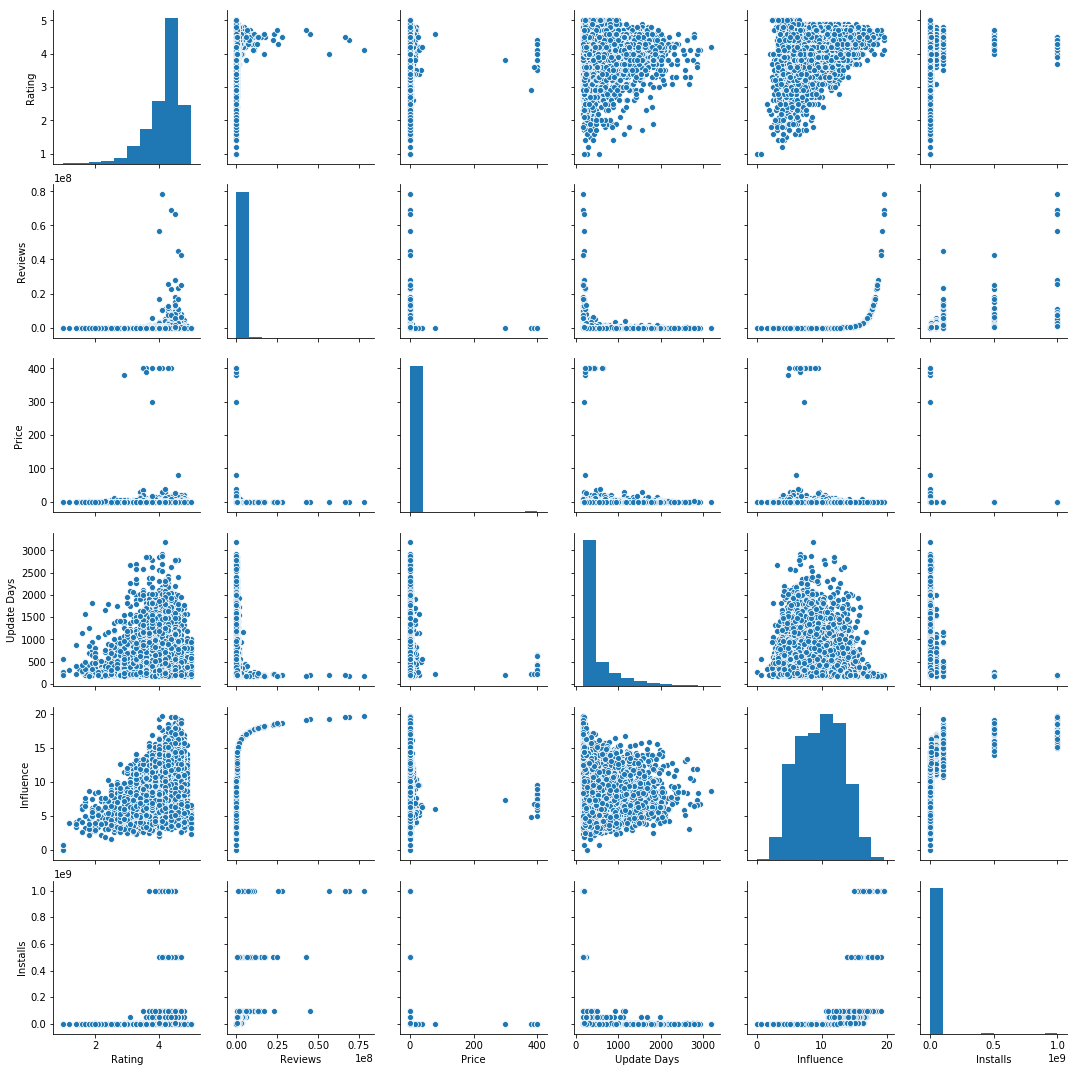

In [60]:
# Pairplot of numberical features
sns.pairplot(gp, vars=['Rating', 'Reviews', 'Price', 'Update Days', 'Influence', 'Installs'])

There are a couple of things to note here. Almost all features are right skewed (barring the aforementioned and log transformed 'Influence' column) except for the 'Rating' feature, whcih is fairly left skewed. 

All of the 'Installs' graphs look a bit unusual because, again, they're discrete values that exist only at specific values.

We'll now look at the average values of our numerical features grouped according to 'Category'. 

In [61]:
# Grouping by 'Category' and averaging all stats. All values are rounded to 2 decimal places. 
gpavg = gp.groupby(['Category']).mean().round(2)
gpavg

,Rating,Reviews,Type,Price,Update Days,Influence,Installs
Category,,,,,,,
ART_AND_DESIGN,4.35,24311.00,0.05,0.10,295.93,8.38,1952293.10
AUTO_AND_VEHICLES,4.20,17366.75,0.01,0.03,277.03,8.44,792955.22
BEAUTY,4.29,9878.25,0.00,0.00,308.52,8.15,672900.00
BOOKS_AND_REFERENCE,4.33,102591.07,0.03,0.11,519.89,8.90,10219570.55
BUSINESS,4.05,46000.69,0.02,0.10,446.97,8.19,3241902.33
COMICS,4.21,44171.00,0.00,0.00,291.72,9.14,847754.72
COMMUNICATION,4.11,1237330.55,0.06,0.17,447.21,10.94,47784575.76
DATING,3.96,30969.51,0.02,0.09,263.74,9.02,1204341.88
EDUCATION,4.36,54776.76,0.03,0.13,442.99,10.62,1778990.65


In [62]:
# Same dataset sorted by 'Installs'
gpavg.sort_values('Installs', ascending=False)

,Rating,Reviews,Type,Price,Update Days,Influence,Installs
Category,,,,,,,
COMMUNICATION,4.11,1237330.55,0.06,0.17,447.21,10.94,47784575.76
SOCIAL,4.21,1218908.07,0.01,0.01,362.63,10.75,29346732.62
VIDEO_PLAYERS,4.03,466509.60,0.03,0.07,483.45,10.28,27115834.48
PRODUCTIVITY,4.18,202884.51,0.05,0.17,465.94,10.23,21142572.99
PHOTOGRAPHY,4.15,423101.09,0.05,0.25,437.39,11.33,18671244.98
TRAVEL_AND_LOCAL,4.05,149006.41,0.04,0.21,338.48,9.57,16082538.89
GAME,4.23,683282.82,0.07,0.28,501.58,11.66,15531041.76
NEWS_AND_MAGAZINES,4.08,122378.26,0.01,0.01,330.82,9.40,12534962.96
TOOLS,4.04,347094.34,0.07,0.25,533.96,9.25,12103947.05


A few interesting trends to notice:

While the Family category had the most apps (as we saw earlier), the Communication and Social apps had far more average downloads. In fact, Family ranked 18th on the list. Medical apps were the least popular.

While Comunication apps were the most popular, Social apps (the second most popular) had more reviews and a higher average favorability rating.

Entertainment apps had the largest influence or visibilty despite being 9th in terms of average downloads.

Overall, however, influence values tend to decrease as the average number of downloads and reviews decrease, despite the relative steadiness in rating levels.

Event apps had the highest average ratings, while dating apps had the lowest average ratings. 

As we've seen, there's a fairly strong and obvious correlation between 'Reviews' and 'Installs'. Apps that have a greater number of downloads will likely have a greater number of reviews. And given what we've seen with the 'Influence' category, apps that have greater reviews and strong ratings will have greater visibilty and greater trust, resulting in more downloads. It's not a perfect correlation, but it does suggest that for a machine learning model, it may become relatively easy for it to predict 'Installs' simply from the 'Reviews' values. We'll find out for sure once we look at the feature importances of our best performing ML algorithm, but it's something to keep in mind for the moment.

Before we move onto inferential analysis, let's take a look at the best and worst performing apps in several different categories, starting with our target variable - 'Installs'.

In [63]:
# Most downloaded apps
gp[['App', 'Installs']].sort_values('Installs', ascending=False).head(20)

,App,Installs
2554,Google+,1.000000e+09
9844,Google News,1.000000e+09
2604,Instagram,1.000000e+09
1872,Subway Surfers,1.000000e+09
336,WhatsApp Messenger,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09
451,Gmail,1.000000e+09
2544,Facebook,1.000000e+09
382,Messenger – Text and Video Chat for Free,1.000000e+09
464,Hangouts,1.000000e+09


In [64]:
# Most reviewed app
gp[['App', 'Reviews']].sort_values('Reviews', ascending=False).head(20)

,App,Reviews
2544,Facebook,78158306.0
336,WhatsApp Messenger,69119316.0
2604,Instagram,66577446.0
382,Messenger – Text and Video Chat for Free,56646578.0
1879,Clash of Clans,44893888.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1872,Subway Surfers,27725352.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
1878,Clash Royale,23136735.0


In [65]:
# Highest rated apps that have greater than 50000 reviews
gp[gp['Reviews'] > 50000].sort_values('Rating', ascending=False).head(20)

,App,Category,Rating,Reviews,Type,Price,Content Rating,Android Ver,Update Days,Influence,Installs
7000,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723.0,0,0.0,Everyone,4,244.0,12.517383,1000000.0
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136.0,0,0.0,Everyone,4,203.0,13.780884,1000000.0
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752.0,0,0.0,Everyone,V,233.0,15.324351,10000000.0
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337.0,0,0.0,Everyone,4,227.0,14.104031,10000000.0
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136.0,0,0.0,Everyone,4,198.0,13.388362,1000000.0
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791.0,0,0.0,Everyone,V,188.0,12.698559,1000000.0
2803,FreePrints – Free Photos Delivered,PHOTOGRAPHY,4.8,109500.0,0,0.0,Everyone,4,185.0,13.172296,1000000.0
1274,Sleep Sounds,HEALTH_AND_FITNESS,4.8,51227.0,0,0.0,Everyone,4,205.0,12.412638,1000000.0
8459,Video Downloader - for Instagram Repost App,VIDEO_PLAYERS,4.8,332623.0,0,0.0,Everyone,4,191.0,14.283381,10000000.0
6707,Vlogger Go Viral - Tuber Game,FAMILY,4.8,1304467.0,0,0.0,Everyone,4,191.0,15.649921,10000000.0


In [66]:
# Lowest rated apps that have greater than 50000 reviews
gp[gp['Reviews'] > 50000].sort_values('Rating').head(20)

,App,Category,Rating,Reviews,Type,Price,Content Rating,Android Ver,Update Days,Influence,Installs
5233,Club Penguin Island,FAMILY,2.8,107441.0,0,0.0,Everyone,4,208.0,12.614317,1000000.0
9430,Egg for Pou,FAMILY,3.0,59096.0,0,0.0,Everyone,4,507.0,12.085531,5000000.0
3021,NBC Sports,SPORTS,3.1,78442.0,0,0.0,Everyone,4,226.0,12.401517,5000000.0
311,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965.0,0,0.0,Teen,4,215.0,12.613828,5000000.0
6327,AfreecaTV,VIDEO_PLAYERS,3.3,381023.0,0,0.0,Everyone,4,192.0,14.044537,10000000.0
4763,Xray Scanner Prank,FAMILY,3.3,355837.0,0,0.0,Everyone,2,788.0,13.976151,10000000.0
8316,Scratch Logo Quiz. Challenging brain puzzle,GAME,3.3,152102.0,0,0.0,Teen,4,218.0,13.126229,10000000.0
1056,CASHIER,FINANCE,3.3,335738.0,0,0.0,Everyone,V,276.0,13.918009,10000000.0
8035,ABC – Live TV & Full Episodes,FAMILY,3.3,50428.0,0,0.0,Teen,5,193.0,12.022224,5000000.0
885,BBC Media Player,ENTERTAINMENT,3.4,87384.0,0,0.0,Everyone,V,872.0,12.601843,10000000.0


In [67]:
# Most amount of days without an update
gp[['App', 'Update Days']].sort_values('Update Days', ascending=False).head(20)

,App,Update Days
7479,FML F*ck my life + widget,3180.0
7430,CJ Poker Odds Calculator,2926.0
10282,FD Shift Calendar Widget,2881.0
8418,DEER HUNTER CHALLENGE,2855.0
8084,Freecell CY,2850.0
9067,Dx Ludo,2848.0
7237,CF-Bench Pro,2782.0
10460,Wi-Fi Rabbit Unlock Key,2779.0
1544,Apk Installer,2776.0
7080,Bubble,2765.0


In [68]:
# Greatest amount of influence
gp[['App', 'Influence']].sort_values('Influence', ascending=False).head(20)

,App,Influence
2544,Facebook,19.585234
336,WhatsApp Messenger,19.532949
2604,Instagram,19.517954
382,Messenger – Text and Video Chat for Free,19.238636
1879,Clash of Clans,19.145869
4005,Clean Master- Space Cleaner & Antivirus,19.122330
1872,Subway Surfers,18.641935
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",18.577981
3665,YouTube,18.518876
1878,Clash Royale,18.482988


In [69]:
# Most expensive apps
gp[['App', 'Price', 'Installs', 'Reviews', 'Rating', 'Influence']].sort_values('Price', ascending=False).head(20)

,App,Price,Installs,Reviews,Rating,Influence
4367,I'm Rich - Trump Edition,400.00,10000.0,275.0,3.6,6.897705
5364,I am rich (Most expensive app),399.99,1000.0,129.0,4.1,6.270799
5359,I am rich(premium),399.99,5000.0,472.0,3.5,7.409742
5373,I AM RICH PRO PLUS,399.99,1000.0,36.0,4.0,4.969813
4362,💎 I'm rich,399.99,10000.0,718.0,3.8,7.911471
5351,I am rich,399.99,100000.0,3547.0,3.8,9.508859
5354,I am Rich Plus,399.99,10000.0,856.0,4.0,8.138565
5369,I am Rich,399.99,5000.0,180.0,4.3,6.651572
5362,I Am Rich Pro,399.99,5000.0,201.0,4.4,6.784909
5356,I Am Rich Premium,399.99,50000.0,1867.0,4.1,8.943075


## Inferential Analysis

We want to briefly delve into a deeper understanding between some of our features. In particular, we'd like to explore the relationship between 'Rating' and 'Installs' as well as 'Influence' and 'Installs'. 

We'll being  with 'Rating' and 'Installs'. If you recall, near the beginning of the cleaning process, we had to drop several rows right from the start because they were missing rating values. We opted to do that rather than droping the rating column altogether or fill in the missing values with either a simple or nuanced set of averages. We also noticed that there seems to be only a small correlation between 'Rating' and 'Installs'. Additionally, the 'Rating' feature is heavily left skewed. So, we'd like to see if there is a significant difference in downloads between those apps that have above average ratings and those that are below average.   

In [70]:
# Define Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In [71]:
# As a reminder here's the correlation between 'Rating' and 'Installs'
pearson_r(gpa['Rating'], gpa['Installs'])

0.05008007099847424

In [72]:
# Installs and Rating data of all ratings above the Rating average
abvrat = gpa.loc[gpa['Rating'] > np.mean(gpa['Rating']),  ['Rating', 'Installs']]
abvrat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 2 to 10840
Data columns (total 2 columns):
Rating      4689 non-null float64
Installs    4689 non-null float64
dtypes: float64(2)
memory usage: 109.9 KB


In [73]:
# Installs and Rating data of all ratings below the Rating average
belrat = gpa.loc[gpa['Rating'] < np.mean(gpa['Rating']),  ['Rating', 'Installs']]
belrat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2866 entries, 0 to 10832
Data columns (total 2 columns):
Rating      2866 non-null float64
Installs    2866 non-null float64
dtypes: float64(2)
memory usage: 67.2 KB


In [74]:
# Installs data for all ratings above and below average ratings
abvratins = abvrat['Installs']
belratins = belrat['Installs']

In [75]:
abvratins.describe()

count    4.689000e+03
mean     1.289569e+07
std      6.529350e+07
min      1.000000e+03
25%      5.000000e+04
50%      1.000000e+06
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [76]:
belratins.describe()

count    2.866000e+03
mean     5.120421e+06
std      5.169606e+07
min      1.000000e+03
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

For our null hypothesis, we'll assume that there is no difference in downloads between apps above and below the average rating. Our alternative hypothesis, of course, will be that there is a difference. We'll implement a 0.05 p-value threshold. 

In [77]:
from scipy import stats
#stats.ttest_ind
stats.ttest_ind(abvratins, belratins)

Ttest_indResult(statistic=5.420578396258519, pvalue=6.1241279278362e-08)

We have a very small p-value, well below 0.05, suggesting that we should reject our null hypothesis and assume that there is a statistically significant difference between the downloads of apps that are above and below the average rating.

The above implies that our analysis between 'Influence' and 'Installs' should provide a similar result. After all, 'Influence' is partially composed from 'Rating'. As above, our null hypothesis will be that there is no significant difference between the downloads of above average influence apps and those below avaerage. We'll also implement a p-value threshold of 0.05. 

In [78]:
# As a reminder here's the correlation between 'Influence' and 'Installs'
pearson_r(gpa['Influence'], gpa['Installs'])

0.2952994792661128

In [79]:
# Installs and Influence data of all ratings above the Rating average
abvinf = gpa.loc[gpa['Influence'] > np.mean(gpa['Influence']),  ['Influence', 'Installs']]
abvinf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3866 entries, 2 to 10840
Data columns (total 2 columns):
Influence    3866 non-null float64
Installs     3866 non-null float64
dtypes: float64(2)
memory usage: 90.6 KB


In [80]:
# Installs and Influence data of all ratings above the Rating average
belinf = gpa.loc[gpa['Influence'] < np.mean(gpa['Influence']),  ['Influence', 'Installs']]
belinf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 0 to 10839
Data columns (total 2 columns):
Influence    3689 non-null float64
Installs     3689 non-null float64
dtypes: float64(2)
memory usage: 86.5 KB


In contrast to the two sets of 'Rating' data, these two sets are more balanced in size.

In [81]:
# Installs data for all ratings above and below average ratings
abvinfins = abvinf['Installs']
belinfins = belinf['Installs']

In [82]:
abvinfins.describe()

count    3.866000e+03
mean     1.933790e+07
std      8.366027e+07
min      1.000000e+04
25%      1.000000e+06
50%      5.000000e+06
75%      1.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

In [83]:
belinfins.describe()

count    3.689000e+03
mean     1.037411e+05
std      4.076037e+05
min      1.000000e+03
25%      5.000000e+03
50%      1.000000e+04
75%      1.000000e+05
max      1.000000e+07
Name: Installs, dtype: float64

In [84]:
from scipy import stats
#stats.ttest_ind
stats.ttest_ind(abvinfins, belinfins)

Ttest_indResult(statistic=13.963748206161926, pvalue=9.053806606919782e-44)

As we suspected, the difference in downloads between those apps that enjoy above average infleunce and those that don't is statisitically significant.

## Initial Model

Let's now build an initial model. We'll be doing a categorical analysis because our target feature is composed of discrete values. Though they may be numerical, because they aren't continuous, a categorical approach may be more promising than a regressive one.

In [85]:
# One-hot encode all of our categorical features
gpa = pd.get_dummies(gpa, columns=['Category', 'Type', 'Content Rating', 'Android Ver'])

Before we split into our training and test arrays, we need to remember that get_dummies adds the additonal features to the end of our dataset. So, we first need to relocate our target variable, 'Installs', back to the end of the dataset.

In [86]:
gpa.head()

,Rating,Reviews,Price,Update Days,Influence,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_0,Type_1,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_1,Android Ver_2,Android Ver_3,Android Ver_4,Android Ver_5,Android Ver_6,Android Ver_7,Android Ver_8,Android Ver_V
0,4.1,159.0,0.0,392.0,6.479891,10000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.7,87510.0,0.0,186.0,12.927071,5000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.5,215644.0,0.0,240.0,13.785462,50000000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,4.3,967.0,0.0,228.0,8.332814,100000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,4.4,167.0,0.0,679.0,6.599598,50000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
# Move target variable to the end of the dataset
feature_order = [feature for feature in list(gpa.columns) if feature not in ["Installs"]] + ["Installs"]
gpa = gpa.loc[:, feature_order]

In [88]:
gpa.head()

,Rating,Reviews,Price,Update Days,Influence,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_0,Type_1,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Android Ver_1,Android Ver_2,Android Ver_3,Android Ver_4,Android Ver_5,Android Ver_6,Android Ver_7,Android Ver_8,Android Ver_V,Installs
0,4.1,159.0,0.0,392.0,6.479891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,10000.0
2,4.7,87510.0,0.0,186.0,12.927071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,5000000.0
3,4.5,215644.0,0.0,240.0,13.785462,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,50000000.0
4,4.3,967.0,0.0,228.0,8.332814,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,100000.0
5,4.4,167.0,0.0,679.0,6.599598,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,50000.0


In [89]:
# Put the feature values into X
    
X = gpa.iloc[:,:-1].values

In [90]:
# Put the target values into y
    
y = gpa.iloc[:,-1].values

In [91]:
# split dataset into test/train sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.25, 
                                                    stratify=None)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5666, 55), (1889, 55), (5666,), (1889,))

In [93]:
# standardize features using scikit-learn
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

We'll test several classification models - logistic regression, SVM, random forest, and KNN.

In [94]:
# Instantiate the various algorithms

# Logistic Regression
# --- Key Parameters ---
# C: the regularization strength (smaller values for greater regularization); default is 1.0
# l2 is the default penalty used for regularizartion;
#         l1 may be used for feature selection
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1)

# Support Vector Machine
# --- Key Parameters ---
# C: how much penalty there is for misclassification (larger values for greater penalty); default is 1.0
# kernel: specifies the kernel type to be used (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’); default is 'rbf'
# gamma: the coefficient for non-linear kernels (default is appox. 1/n_features)
from sklearn.svm import SVC
svm = SVC(C=1, kernel="linear", gamma=.1)

# Random Forest (ensemble of Decision Trees)
# --- Key Parameters ---
# n_estimators: the number of trees in the forest; default is 10
# max_depth: the depth of the tree; defualt is None, full expansion
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)

# k-Nearest Neighbor
# --- Key Parameters ---
# n_neighbors: number of neighbors to use; default is 5
# weights: weight function used; default is 'uniform'
        # 'uniform' means all points are weighted equally;
        # 'distance' means closer points have greater influence
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [95]:
# 5-fold cross validation for multiple algorithms

from sklearn.model_selection import cross_val_score
classifiers = [log_reg, svm, forest, knn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=5))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

In [96]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5],
                               index=["LR", "SVM", "Forest", "KNN"])
models_df

,1,2,3,4,5
LR,0.530756,0.487676,0.509717,0.489832,0.524358
SVM,0.579965,0.586268,0.588339,0.556145,0.573959
Forest,0.564148,0.551937,0.567138,0.536693,0.543844
KNN,0.378735,0.390845,0.372792,0.390805,0.390611


In [97]:
# Find the mean and standard deviation of all 5 runs of each model.
models_df["Mean"] = models_df.mean(axis=1)
models_df["STD"] = models_df.std(axis=1)
models_df

,1,2,3,4,5,Mean,STD
LR,0.530756,0.487676,0.509717,0.489832,0.524358,0.508468,0.017495
SVM,0.579965,0.586268,0.588339,0.556145,0.573959,0.576935,0.011553
Forest,0.564148,0.551937,0.567138,0.536693,0.543844,0.552752,0.011616
KNN,0.378735,0.390845,0.372792,0.390805,0.390611,0.384757,0.007581


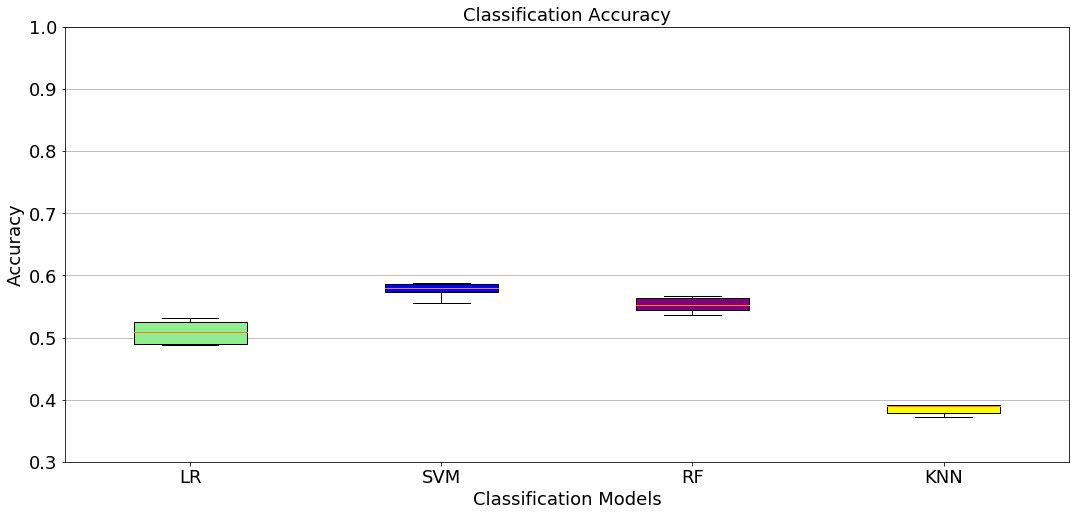

In [98]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))

# rectangular box plot
# place the cross-validated model_scores list from above
# into bplot_models here ------->
                           ##############
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)
                           ##############
    
# fill with colors - Models
colors_d = ["lightgreen", "blue", "purple", "yellow"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
# adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.3, 1.0))
axes.set_title('Classification Accuracy', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'SVM', 'RF', 'KNN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

## Tuning the Model

None of the models did particularly well. While SVM and random forest performed the best, we'll just tune random forest for now because finding its feature importances is relatively straightforward. 

In [99]:
# Hyperparameter tuning can be done manually or using Grid Search
# GridSearch returns the best model from among the various given hyperparameters

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=forest, 
                  param_grid=[{'n_estimators': [50, 100, 200], 'min_samples_split': [2, 4, 6] }], 
                  scoring='accuracy', 
                  cv=5)

In [101]:
# GridSearch, by default, will return the best model
# Cross Validation evaluates the returned GridSearch model

cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=5)

array([0.58523726, 0.58010563, 0.59275618, 0.556145  , 0.57573074])

In [102]:
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)

print(f"Train score: {train_score} \nTest score: {test_score}")

Train score: 0.9288739851747264 
Test score: 0.6008470089994706


Our training accuracy improved quite a bit, and our test accuracy is a few percent higher than the inital training data but still only around 60%. The discrepency between the these two post-GridSearch scores suggests a great deal of overfitting. 

Since we're dealing with an imbalanced dataset, let's also look at precision, recall, and f1. 

In [124]:
gs.fit(X_train_std, y_train)
y_pred = gs.predict(X_test_std)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')

C:\Users\K\Anaconda373\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1: ' + str(f1))

Precision: 0.4671946122228532
Recall: 0.5017764156975558
F1: 0.45032179725825083


Let's employ PCA to see if a dimensionalty reduction might help.

In [103]:
# Import and fit PCA
from sklearn.decomposition import PCA
pcagpa = PCA().fit(X_train_std)

In [104]:
# Cumulative sum of the explained variance
pcapca = pcagpa.explained_variance_ratio_.cumsum()

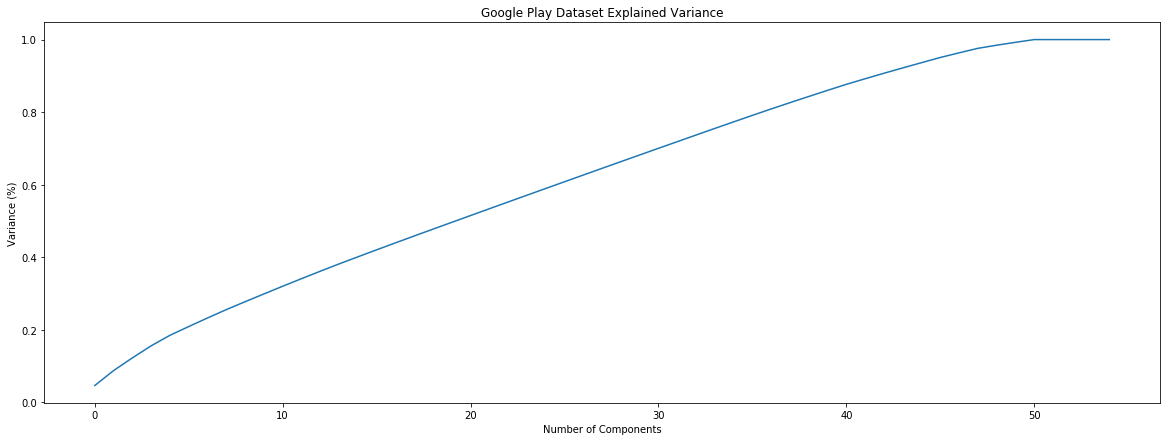

In [105]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(20,7))
plt.plot(pcagpa.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Google Play Dataset Explained Variance')
plt.show()

It appears that only a small dimensionalty reduction is in order. We would need to do further analysis to determine the appropriate variables to discard. A multicollinearity analysis may be fruitful in that regard.

For the moment, we'll move onto determining the most important features for our random forest model. 

In [106]:
# View the parameters that were determined to be the best following the GridSearch

gs.best_params_

{'min_samples_split': 6, 'n_estimators': 200}

In [107]:
# Hyperparameter details of the best estimator 
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Finally, let's determine the features that the model finds to be the most important.

In [116]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=6)
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
rf.feature_importances_

array([8.60908993e-02, 2.99470803e-01, 8.95041811e-03, 9.07951879e-02,
       2.85732096e-01, 2.65739768e-03, 2.91661777e-03, 1.74375050e-03,
       4.38614180e-03, 5.18337581e-03, 2.32389185e-03, 5.74308205e-03,
       2.37985282e-03, 3.29661326e-03, 2.19110613e-03, 1.57548738e-03,
       1.18439689e-02, 6.37743767e-03, 2.86882443e-03, 8.80029152e-03,
       4.92293472e-03, 2.17654894e-03, 1.40276247e-03, 6.40771099e-03,
       2.76841910e-03, 5.35617852e-03, 4.33836278e-03, 2.19073330e-03,
       5.35636356e-03, 5.75046310e-03, 6.26289608e-03, 4.54076473e-03,
       4.34128323e-03, 6.21667013e-03, 9.00956363e-03, 5.09738480e-03,
       4.81565086e-03, 2.51705601e-03, 5.84172292e-03, 6.00945850e-03,
       2.55400043e-04, 9.15152037e-03, 4.74849023e-03, 4.35087146e-03,
       7.44539473e-03, 1.27720657e-04, 1.75299765e-03, 7.26198364e-03,
       4.11782199e-03, 1.12066637e-02, 6.38432220e-03, 1.70966858e-03,
       1.71276882e-03, 2.92887343e-04, 8.83131606e-03])

In [118]:
print(np.sort(rf.feature_importances_)[::-1])

[2.99470803e-01 2.85732096e-01 9.07951879e-02 8.60908993e-02
 1.18439689e-02 1.12066637e-02 9.15152037e-03 9.00956363e-03
 8.95041811e-03 8.83131606e-03 8.80029152e-03 7.44539473e-03
 7.26198364e-03 6.40771099e-03 6.38432220e-03 6.37743767e-03
 6.26289608e-03 6.21667013e-03 6.00945850e-03 5.84172292e-03
 5.75046310e-03 5.74308205e-03 5.35636356e-03 5.35617852e-03
 5.18337581e-03 5.09738480e-03 4.92293472e-03 4.81565086e-03
 4.74849023e-03 4.54076473e-03 4.38614180e-03 4.35087146e-03
 4.34128323e-03 4.33836278e-03 4.11782199e-03 3.29661326e-03
 2.91661777e-03 2.86882443e-03 2.76841910e-03 2.65739768e-03
 2.51705601e-03 2.37985282e-03 2.32389185e-03 2.19110613e-03
 2.19073330e-03 2.17654894e-03 1.75299765e-03 1.74375050e-03
 1.71276882e-03 1.70966858e-03 1.57548738e-03 1.40276247e-03
 2.92887343e-04 2.55400043e-04 1.27720657e-04]


In [119]:
# Sort the feature importances by their original index position, then reverse the order
# so that they are displayed from largest (most important) to smallest.

rf.feature_importances_.argsort()[::-1]

array([ 1,  4,  3,  0, 16, 49, 41, 34,  2, 54, 19, 44, 47, 23, 50, 17, 30,
       33, 39, 38, 29, 11, 28, 25,  9, 35, 20, 36, 42, 31,  8, 43, 32, 26,
       48, 13,  6, 18, 24,  5, 37, 12, 10, 14, 27, 21, 46,  7, 52, 51, 15,
       22, 53, 40, 45], dtype=int64)

In [120]:
# Convert columns from an Index object to a numpy array so that we can pass a list/mask to it
gpanoin = gpa.drop('Installs', axis=1)
features = np.array(gpanoin.columns)
features

array(['Rating', 'Reviews', 'Price', 'Update Days', 'Influence',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE',
       'Category_BUSINESS', 'Category_COMICS', 'Category_COMMUNICATION',
       'Category_DATING', 'Category_EDUCATION', 'Category_ENTERTAINMENT',
       'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE',
       'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_0', 'Type_1',
       'Content Rating_Adults

In [121]:
best_features_in_order = rf.feature_importances_.argsort()[::-1]

# display the best features in order
print("The best features in order:")

features[best_features_in_order]

The best features in order:


array(['Reviews', 'Influence', 'Update Days', 'Rating', 'Category_FAMILY',
       'Android Ver_4', 'Content Rating_Everyone', 'Category_TOOLS',
       'Price', 'Android Ver_V', 'Category_GAME', 'Content Rating_Teen',
       'Android Ver_2', 'Category_LIFESTYLE', 'Android Ver_5',
       'Category_FINANCE', 'Category_PRODUCTIVITY', 'Category_SPORTS',
       'Type_1', 'Type_0', 'Category_PHOTOGRAPHY',
       'Category_COMMUNICATION', 'Category_PERSONALIZATION',
       'Category_MEDICAL', 'Category_BUSINESS',
       'Category_TRAVEL_AND_LOCAL', 'Category_HEALTH_AND_FITNESS',
       'Category_VIDEO_PLAYERS', 'Content Rating_Everyone 10+',
       'Category_SHOPPING', 'Category_BOOKS_AND_REFERENCE',
       'Content Rating_Mature 17+', 'Category_SOCIAL',
       'Category_NEWS_AND_MAGAZINES', 'Android Ver_3',
       'Category_EDUCATION', 'Category_AUTO_AND_VEHICLES',
       'Category_FOOD_AND_DRINK', 'Category_MAPS_AND_NAVIGATION',
       'Category_ART_AND_DESIGN', 'Category_WEATHER', 'Category

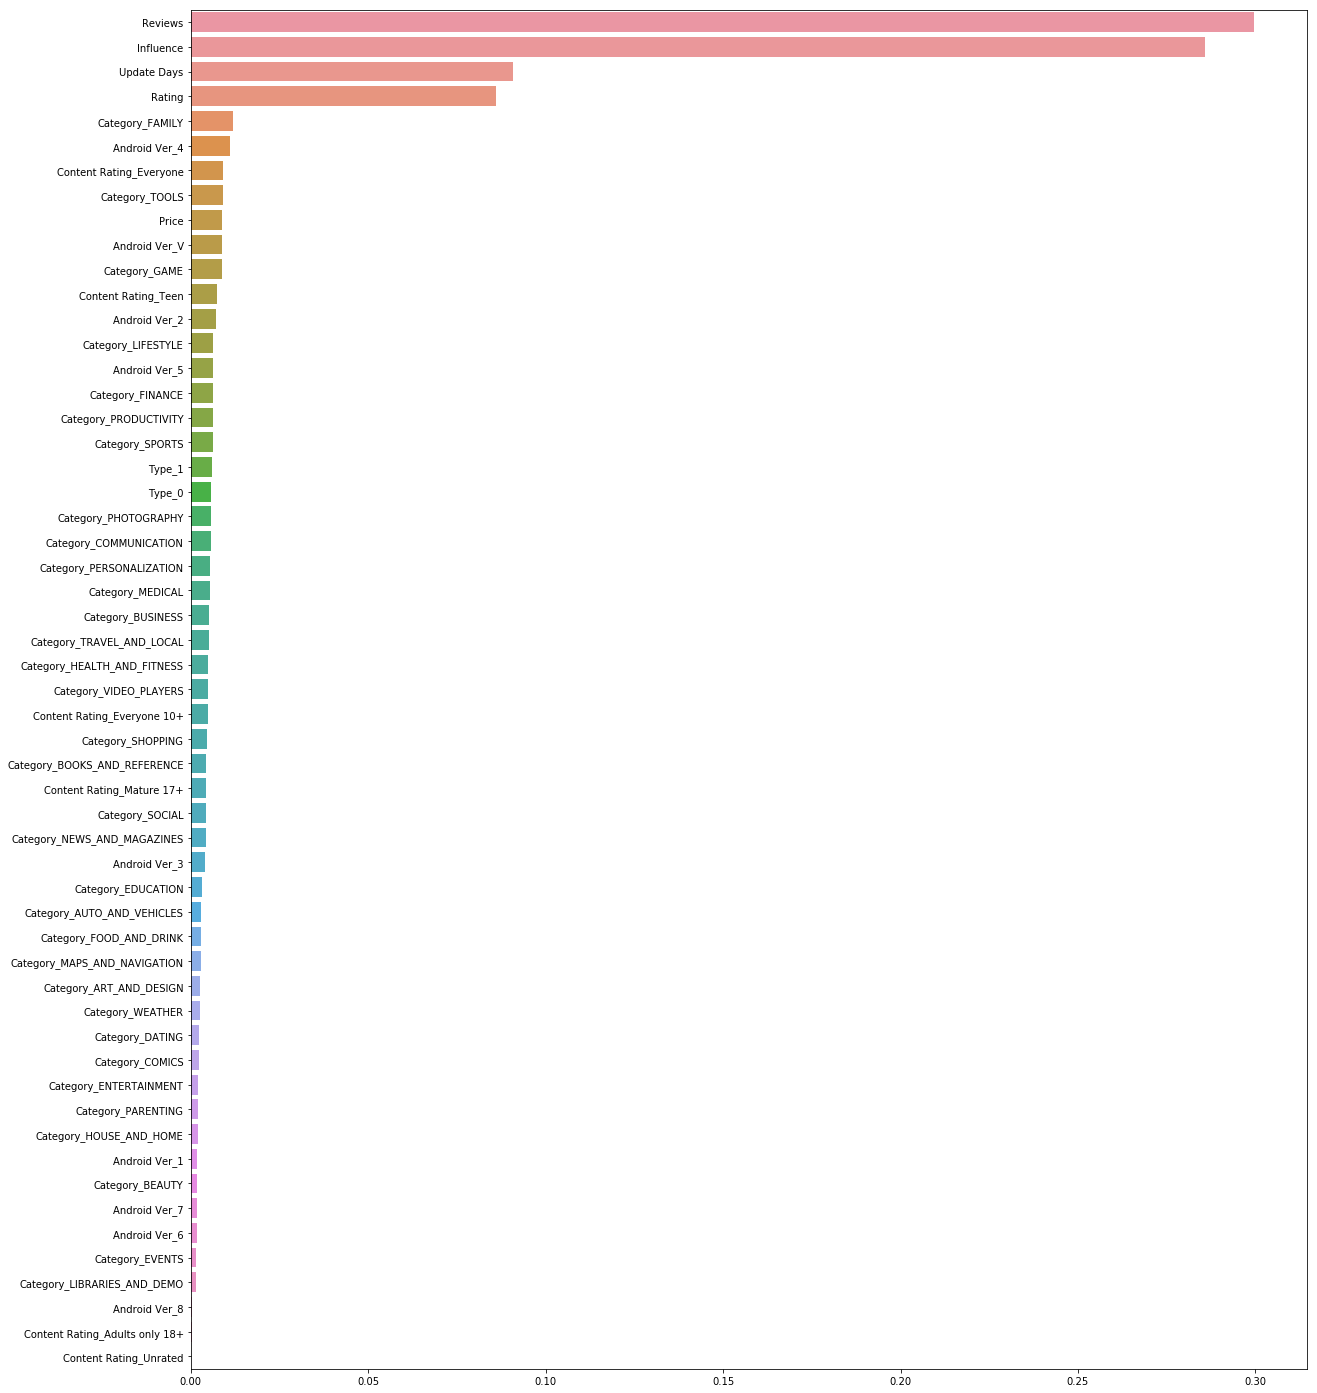

In [122]:
plt.figure(figsize=(20, 25))
sns.barplot(x=np.sort(rf.feature_importances_)[::-1], y=features[best_features_in_order])

It's not entirely surprising that 'Reviews' was the most important feature, considering that there was a strong correlation between it and 'Installs'. Since 'Influence' was created using 'Reviews', it's also not surprising that it is highly influential as well. We see that 'Update Days' and 'Rating' are also important. The latter makes sense given our earlier inferential analysis. While the former didn't seem like it would be particularly useful, the model did seem to find it somewhat important.

## Takeaways

While our model and the dataset have their limitations, there are some things that we do understand about app downloads from the Google Play Store. 

First, reviews and ratings do matter. They both make an app more visible and more trusted. Updating an app fairly regularly would also result in more downloads because the app continuew to stay functional with Android software updates. 

We also notice with the feature importances that Android version 4 was a more improtant feature than any of the other Android versions. This suggests that apps that are compatible with more versions of Android will have a greater number of downloads. This could be due to a couple of reasons. The first is that not everyone updates their phone software in a timely manner, either because they ignore the updates or because of restrictions imposed by their phonebrand/carrier. The second is that phones compatible with more Android versions will likely have been available on the Play Store for a longer length of time. In either case, this results in a greater number of downloads.   


## Future Direction

Reducing the number of classes could potentially make the model more accurate and the target variables more balanced, but it may also lead to a less useful model. For instance, classifying all apps with downloads between 1 and 10,000 downloads together dowesn't seem like too big of a deal, classifying apps between 500,000 and 5,000,000 downloads together would be potentially problematic. It would be like applying a hammer to do a scalpel's job.

There were a few paths left unexplored including exploring a tuning of the SVM model, testing for multicollinearity, and reducing dimensions.

More data would likely be useful. Having closer to 100,000 apps (given that there are close to 3 million apps on the Play Store, as of this writing), along with additional features such as the date that the app first appeared on the Play Store and how frequently it had been updated would provide more potentially useful features.   

Sentiment analysis of the reviews may also be helpful. It may provide us with information about the passion/enthusiasm of the users of particular apps.